# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.<br>

Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool easily allows you to conduct the analysis, then in plain English interprets the output.<br>

# Dataset

Dataset that I am using is about users in social networks. It describes ocial network has several business clients which can put their ads on the social network and one of their clients is a car company who has just launched their brand new luxury SUV for a ridiculous price and we're trying to see which of these users of the social network are going to buy this brand-new SUV.<br>


We are going to build a model that is going to predict if users choose to buy or not based on two variables which are going to be the age and the estimated salary<br>

**Goal is to find right users in right category. We will use classifier to predict user choice to purchase SUV or not**<br>

Key variables/features are : <br>
User ID<br>
Gener: Male or female<br>
Age<br>
Estimated Salary<br>
**Dependent Variable**-Purchased: Categorical variable showing if item is purchased or not.<br>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
feature=[ "Age" , "EstimatedSalary"]

In [5]:
feature

['Age', 'EstimatedSalary']

In [6]:
x,y=dataset[feature] , dataset.Purchased

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
type(x)

pandas.core.frame.DataFrame

In [9]:
x.shape

(400, 2)

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
y.shape

(400,)

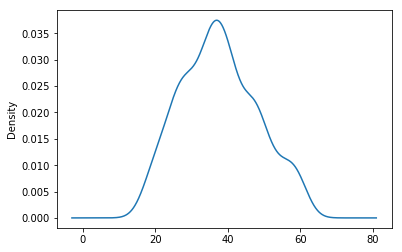

In [12]:
x.Age.plot(kind='density')

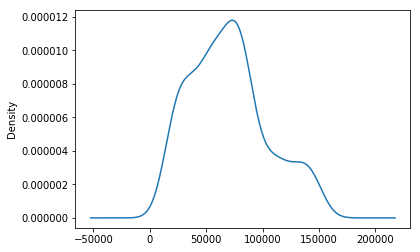

In [13]:
x.EstimatedSalary.plot(kind='density')

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
x_train.shape

(300, 2)

In [16]:
x_test.shape

(100, 2)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [18]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [19]:
type(x_train)

numpy.ndarray

## Fitting Logistic Regression to the Training set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

At column 8. we can see a value of 1 showing that customer has chosen to buy a car at this point as per our prediction.Same is with column 10, 19,22 and so on.

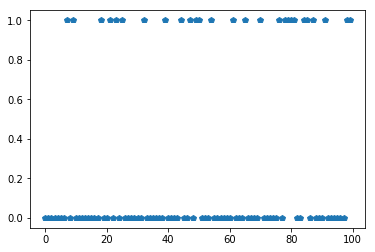

In [23]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

Plot shows our predicted results from test set where total values were 100. And point o shows probablity of not purchasing and 1 shows prob. of purchasing. We can find value 1 at points on x-axis i.e 8,10,19,22 in start and then more values 

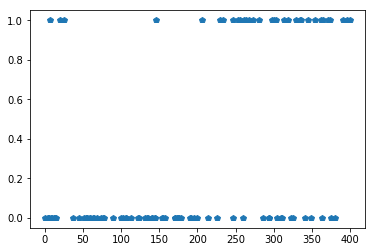

In [24]:
plt.plot(y_test, "p")

## Making the confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

**To explain confusion matrix, we have correct values in Diagnols i.e TP and TN. So we have 65+24=89 correct predicts. <br>
Then we have values other than diagnols which are not correct predictions i.e 8+3=11. Out of our 100 values in x_test set, we predicted 89 correct and 11 were incorrect.**

## Checking accuracy score in Percentage

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred)

0.89

## Visualizing the results

### Training set

In [29]:
from matplotlib.colors import ListedColormap

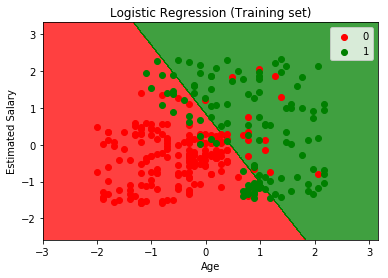

In [30]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red points are the observation points where purchase not done i.e =0 . Green points represent point where purchased is done i.e equal to 1.<br>
Ofcourse one may find point where users with green dots are in red zone of classifier and vice versa. That's where prediction is failed.

**Analysis: Note that age has negative values. It does not show minus age. We have actually scaled our data to normalization. So, we ll not bother about that. It will be important when we try to discuss impact. For now, we would concentrate on association.<br>
1-Plot shows that people with younger age tend to be not very excited in buying this new brand SUV. SUV purchase is higher in people with higher age. There are some young users who are in green spots who seem to buy SUV. Perhaps due to higher salary at young age or parent's loan.
2- Users with a lower estimated salaries (also those who are younger....makes sense!) tend to buy SUV. However, we have some green at lower estimated salary end and we can see that some older people have bought it with a lower salary too.<br>
Our prediction boundary is shown by a straight line as we are working linear logistic regression case so our classifier is linear and hence straight line. We could not predict all user's purchasing choice correctly as users are not linearly distributed**

### Visualizing the Test set results

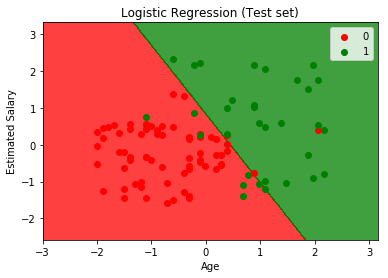

In [31]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**This is the result that we saw in our confusion matrix with 89 correct prediction and 11 incorrect.**